## Finall Project

- Student ID: 20127514
- Full Name: Trần Thị Bảo Hương

# Collecting data

## What subject is your data about? 

The subject of data: Water potability

## What is the source of your data?
[https://www.kaggle.com/datasets/adityakadiwal/water-potability]

## You can check the data license



## How did authors collect data?



# Import 

In [6]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Read File

In [7]:
data_df = pd.read_csv('water_potability.csv')
data_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

# Exploring data


### Số dòng và số cột

In [8]:
n_row = len(data_df)
n_col = len(data_df.columns)
print ('Số dòng', n_row, '\nSố cột', n_col)

Số dòng 3276 
Số cột 10


### Ý nghĩa các dòng

Mỗi dòng là số liệu của một mẫu nước, bao gồm: độ ph, Hardness,	Solids,	Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes,	Turbidity, Potability

### Có hàng nào bị trùng hay không?

In [9]:
data_df.duplicated().all()

False

### What is the meaning of each column?

Ý nghĩa của các giá trị

|Tên cột | Mô tả|
|---|----------------|
|pH giá trị|PH là thông số quan trọng trong việc đánh giá cân bằng axit-bazơ của nước. Nó cũng là chỉ số về tình trạng axit hoặc kiềm của trạng thái nước. WHO đã khuyến cáo giới hạn tối đa cho phép của pH từ 6,5 đến 8,5.|
|Độ cứng|Độ cứng chủ yếu do muối canxi và magie gây ra. Những muối này được hòa tan từ các trầm tích địa chất mà qua đó nước di chuyển. Khoảng thời gian nước tiếp xúc với vật liệu tạo độ cứng giúp xác định độ cứng có trong nước thô. Độ cứng ban đầu được định nghĩa là khả năng kết tủa xà phòng của nước do Canxi và Magiê |
|Chất rắn (Tổng chất rắn hòa tan - TDS)|Nước có khả năng hòa tan nhiều loại khoáng chất vô cơ và hữu cơ hoặc muối như kali, canxi, natri, bicacbonat, clorua, magiê, sunfat, v.v. hương vị và màu sắc pha loãng khi xuất hiện của nước. Đây là thông số quan trọng cho việc sử dụng nước. Nước có giá trị TDS cao chứng tỏ nước có nhiều khoáng chất. Giới hạn mong muốn cho TDS là 500 mg/l và giới hạn tối đa là 1000 mg/l được quy định cho mục đích uống|
|Chloramines|Clo và chloramine là những chất khử trùng chính được sử dụng trong hệ thống nước công cộng. Chloramine thường được hình thành khi thêm amoniac vào clo để xử lý nước uống. Nồng độ clo lên tới 4 miligam trên lít (mg/L hoặc 4 phần triệu (ppm)) được coi là an toàn trong nước uống|
|Sulfate|Sulfate là những chất tự nhiên được tìm thấy trong khoáng chất, đất và đá. Chúng hiện diện trong không khí xung quanh, nước ngầm, thực vật và thực phẩm. Việc sử dụng thương mại chính của sulfat là trong ngành hóa chất. Nồng độ sunfat trong nước biển là khoảng 2.700 miligam trên lít (mg/L). Nó nằm trong khoảng từ 3 đến 30 mg/L ở hầu hết các nguồn cung cấp nước ngọt, mặc dù nồng độ cao hơn nhiều (1000 mg/L) được tìm thấy ở một số vị trí địa lý|
|Độ dẫn điện|Nước tinh khiết không phải là chất dẫn điện tốt mà là chất cách điện tốt. Tăng nồng độ ion giúp tăng cường tính dẫn điện của nước. Nói chung, lượng chất rắn hòa tan trong nước quyết định độ dẫn điện. Độ dẫn điện (EC) thực sự đo lường quá trình ion của một dung dịch cho phép nó truyền dòng điện. Theo tiêu chuẩn của WHO, giá trị EC không được vượt quá 400 μS/cm|
|Organic_carbon|Tổng lượng Carbon hữu cơ (TOC) trong nguồn nước đến từ chất hữu cơ tự nhiên đang phân hủy (NOM) cũng như các nguồn tổng hợp. TOC là thước đo tổng lượng carbon trong các hợp chất hữu cơ trong nước tinh khiết. Theo US EPA < 2 mg/L as TOC trong nước đã qua xử lý/nước uống, và < 4 mg/Lít trong nước nguồn được sử dụng để xử lý|
|Trihalomethanes|THMs là những hóa chất có thể được tìm thấy trong nước được xử lý bằng clo. Nồng độ THMs trong nước uống thay đổi tùy theo mức độ chất hữu cơ trong nước, lượng clo cần thiết để xử lý nước và nhiệt độ của nước đang được xử lý. Mức THM lên đến 80 ppm được coi là an toàn trong nước uống|
|Độ đục|Độ đục của nước phụ thuộc vào lượng chất rắn có trong trạng thái lơ lửng. Nó là thước đo các đặc tính phát sáng của nước và phép thử được sử dụng để chỉ ra chất lượng xả thải đối với chất keo. Giá trị độ đục trung bình thu được cho Wondo Genet Campus (0,98 NTU) thấp hơn giá trị khuyến nghị của WHO là 5,00 NTU|
|Khả năng uống được|Cho biết liệu nước có an toàn cho con người sử dụng hay không trong đó 1 có nghĩa là Uống được và 0 có nghĩa là Không uống được|

Ý nghĩa các cột

|Cột tên|Cột trung bình|
|------------|--------|
|ph| pH của 1. nước (0 đến 14)|
|Độ cứng| Dung tích nước để kết tủa xà phòng tính bằng mg/L|
|Chất rắn| Tổng chất rắn hòa tan tính bằng ppm|
|Chloramine| Lượng Chloramine trong pp|
|Sulfat| Lượng Sulfate hòa tan theo mg/L|
|Độ dẫn điện| Độ dẫn điện của nước tính bằng μS/cm|
|carbon hữu cơ| Lượng carbon hữu cơ tính bằng ppm|
|Trihalomethanes| Lượng Trihalomethanes tính bằng μg/L|
|Độ đục| Đo đặc tính phát sáng của nước trong NTU|
|Khả năng uống| Cho biết nước có an toàn cho người tiêu dùng hay không. Uống được: 1 và Không uống được: 0|

### Kiểu dữ liệu hiện tại của các cột? 

In [10]:
data_df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

### Are there columns having inappropriate data types?

What is the percentage of missing values?


In [11]:
data_df.isnull().sum(axis=0)/n_row*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Min? max? Are they abnormal?

In [12]:
pd.DataFrame([data_df.max(axis=0),data_df.min(axis=0)], index=['max', 'min'])


ph  Hardness        Solids  Chloramines     Sulfate  Conductivity  \
max  14.0   323.124  61227.196008       13.127  481.030642    753.342620   
min   0.0    47.432    320.942611        0.352  129.000000    181.483754   

     Organic_carbon  Trihalomethanes  Turbidity  Potability  
max            28.3          124.000      6.739         1.0  
min             2.2            0.738      1.450         0.0

Nhận xét: Các giá trị không có bất thường

In [13]:
data_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Nhận xet: Dựa và giá trị trung bình và trung vị ta có thể thấy được phần lớn các thuộc tính có phân bố lệch dương

## Câu hỏi được đặt ra:
#### Những mẫu nước được xem là an toàn trong tập dữ liệu (Potability = 1) có bao nhiêu mẫu được coi là thực sự an toàn 
- Trả lời câu hỏi này ta sẽ nắm bắt được những đặc điểm chung của mẫu dữ liệu được xem là an toàn với sức khỏe con người. Với những trường hợp như thế nào thì được xem là trường hợp đặc biệt 
#### Khi đọc bản mô tả thuộc tính thấy được độ dẫn điện được quyết định bởi chất lượng hòa tan của chất rắn. Vậy thì tổng số lượng hòa tan chất rắn và độ dẫn điện sẽ có ảnh hưởng nhất định nào không. Chúng có quan hệ nào không, liệu quan hệ đó có giúp chúng ta tính toán thuộc tính này đựa trên thuộc tính kia hay không?
- Trả lời câu hỏi này sẽ là rõ được vấn đề chất lượng hòa tan và số chất hòa tan có ảnh hưởng đến nhau hay không. Nếu chúng bị ảnh hưởng lẫn này t có thế loại bớt 1 thuộc tính để giảm chiều dữ liệu. Điều này sẽ giúp khi học các mô hình học máy, phân lớp tỉ lệ chính xác cao hơn.
#### Độ đục của nước là một trong những chỉ số chúng ta có thế nhìn thấy trực tiếp. Vậy đối với các thuộc tính như: TDS, clo, sulfate, cảbon, tri.... có thể dự đoán được độ đục của nước hay không? Nếu dự đoán được thì mô hình bạn dự đoán sẽ có độ chính xác là bao nhiêu? 
- Trên thực thế không dễ dàng để nhận định được nguồn nước đó, mẫu nước đó có anh toan cho sức khỏe con người, có phù hợp để dùng và sinh hoạt hay không. Việc nhận biết mức độ an toàn thông qua độ đục sẽ mang tính tương đối và dễ dàng hơn trong thực tế. 
- Khi trả lời câu hỏi này ta có thể dự đoán được những yếu tố ảnh hưởng đến độ đục và từ đó dễ dàng nhận biết bằng mắt.
#### Ngày nay vấn đề trồng thủy canh được xem là một phương pháp nông nghiệp phổ biến. Trong việc trồng thủy canh thì nguồn nước chiếm vai trò quan trọng trong việc quyết định sản phẩm. Vậy đối với bộ dữ liệu này thì những màu phù hợp để thực hiện làm môi trường để trồng thủy canh. Liệu có phải những mẫu được xem là an toàn sẽ phù hợp với việc trồng thủy canh. 
- Nước đối với nông nghiệp ảnh hưởng quan trọng, với những nguồn nước bị ô nhiềm thì các thực phẩm được trồng trọt, tưới tắm từ nguồn nước đó cũng ảnh hưởng khá lớn. Việc yêu cầu thực phẩm sạch ngày nay càng được quan tâm nên khi chú trọng tới nguồn nước sẽ giúp cho những thực phẩm đó sạch sẽ, có năng suất hơn. 
- Trả lời câu hỏi sẽ giúp ta thấy bộ dữ liệu này liệu có bao nhiêu phần trăm phù hợp để phát triển nông nghiệp. Những yếu tố ảnh hưởng đến việc trồng thủy canh mà do nước quyết định. 

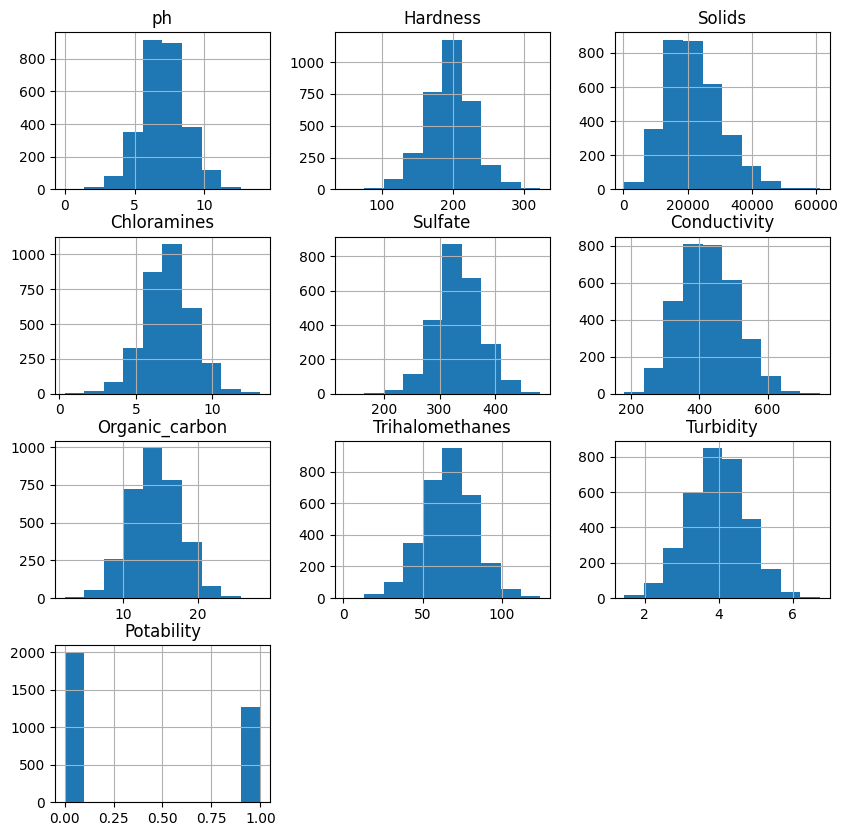

In [14]:
p = data_df.hist(figsize = (10,10))

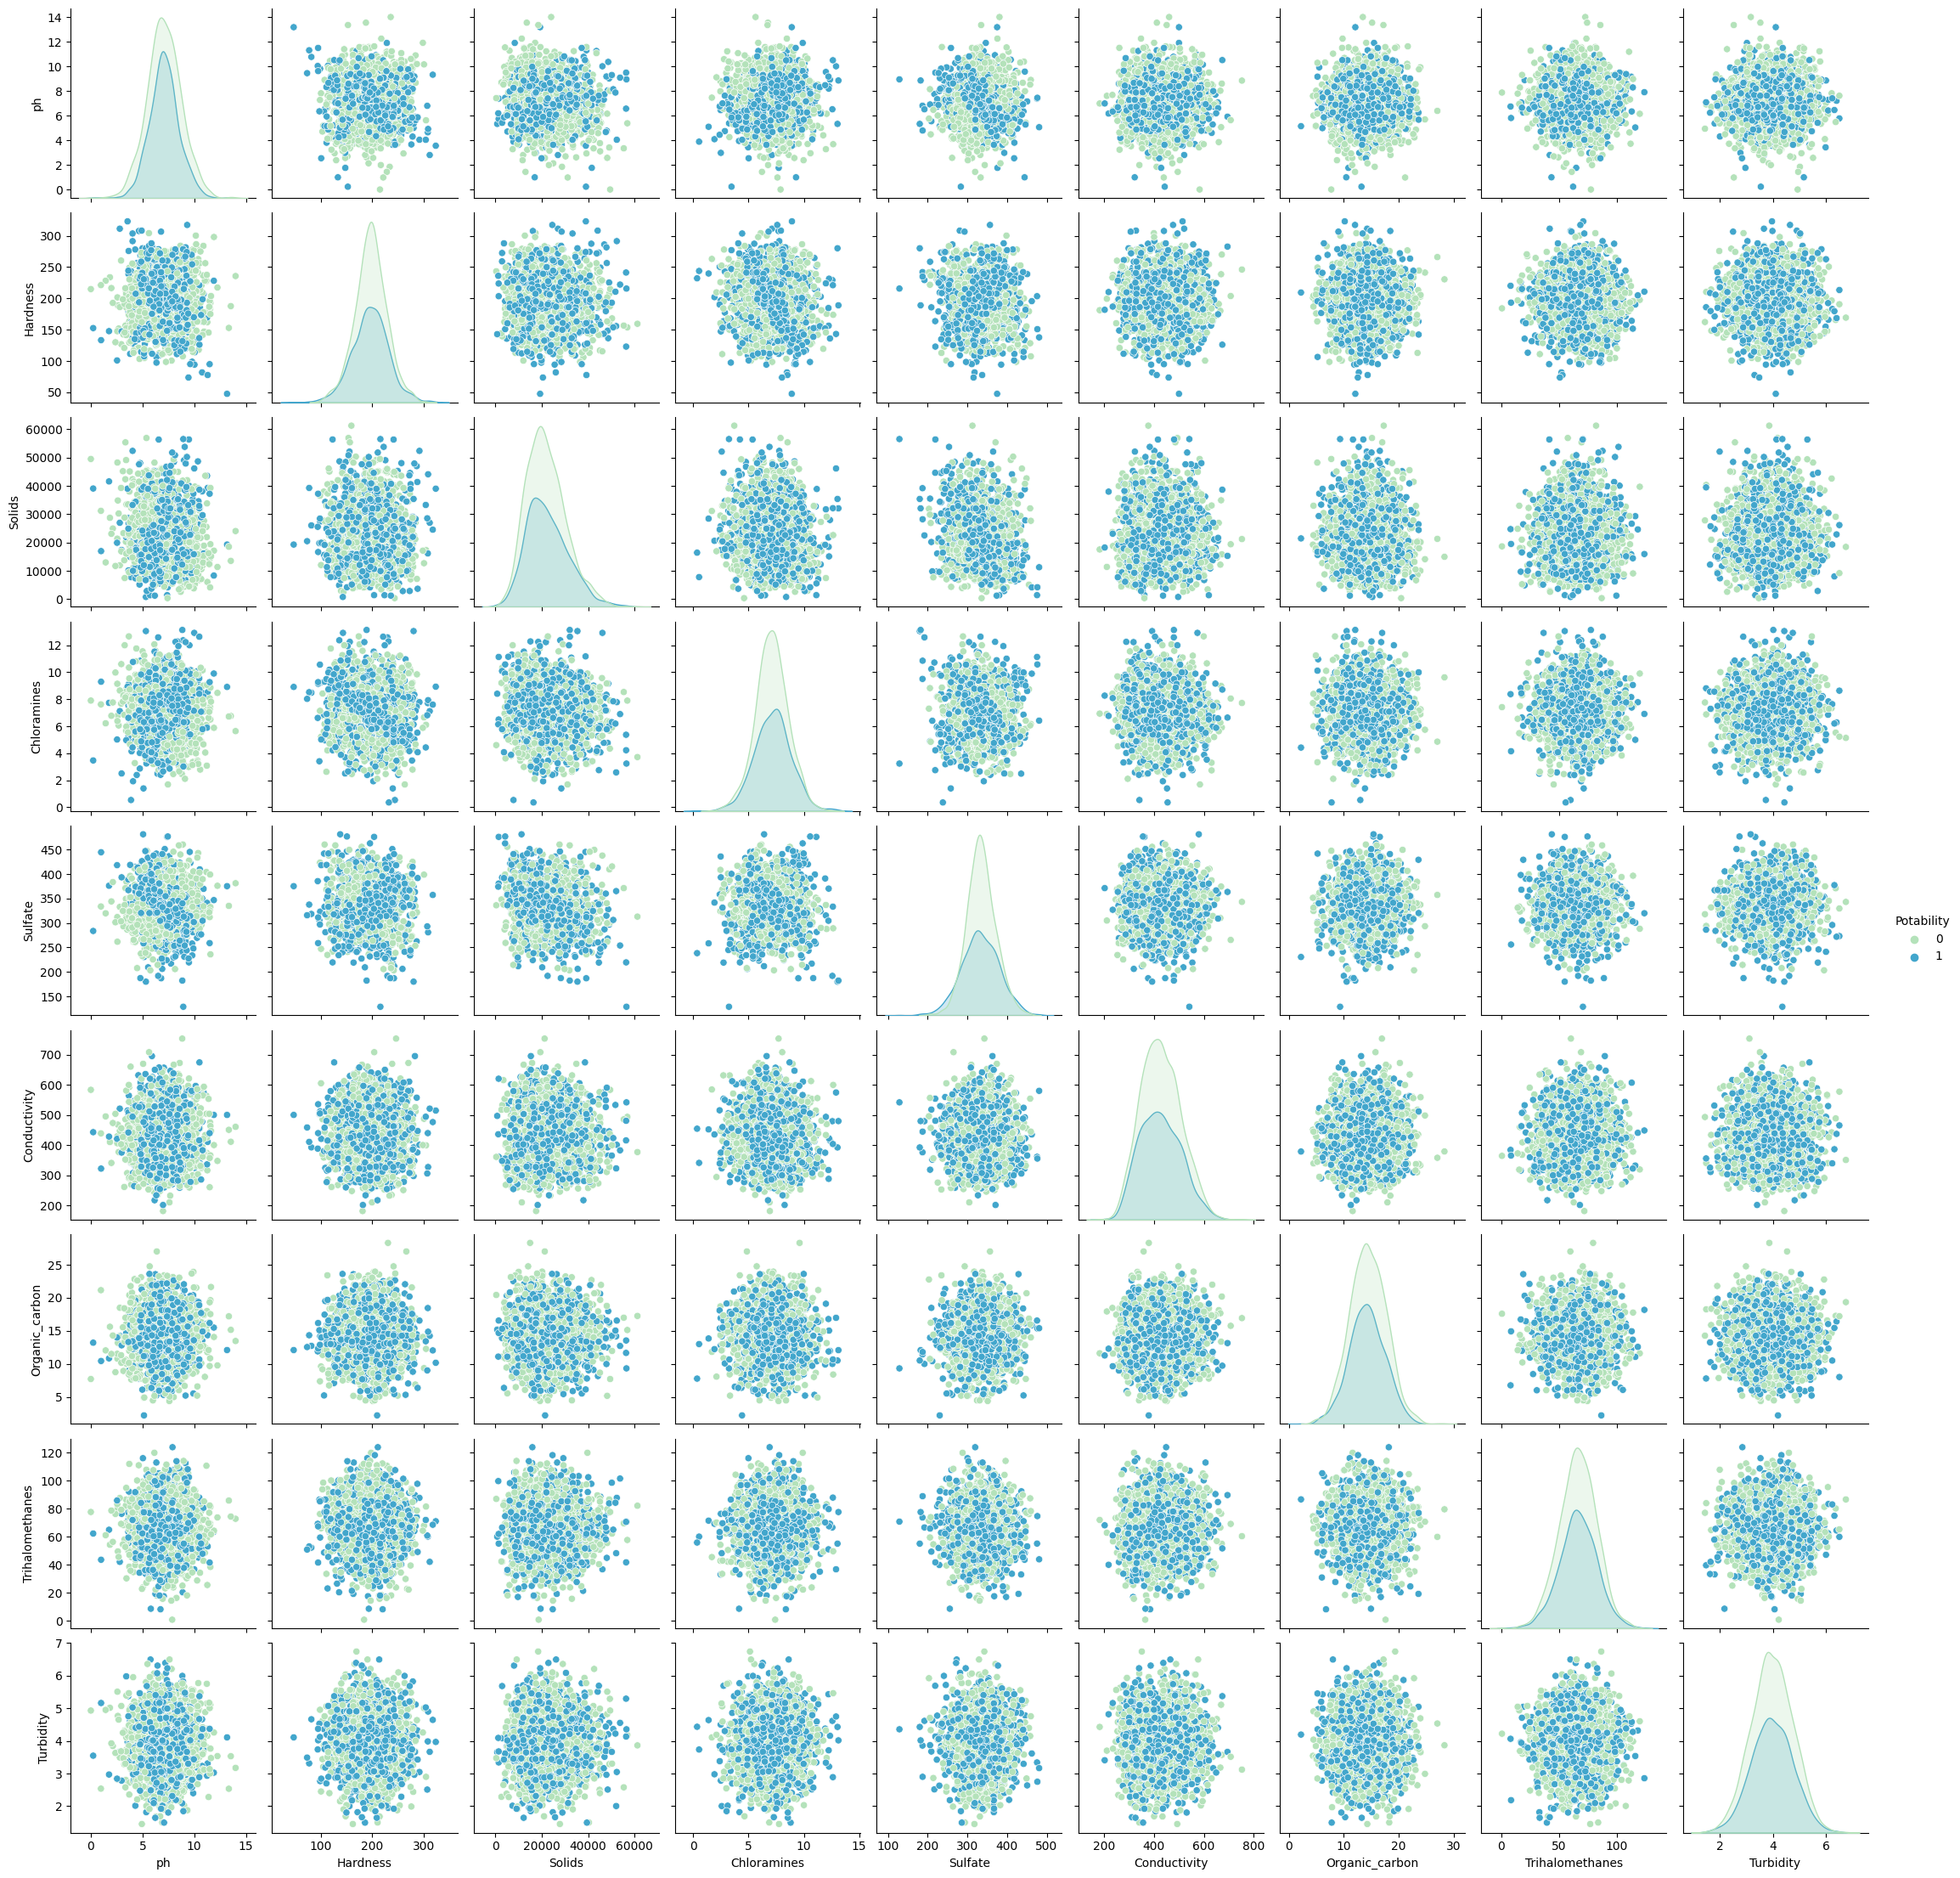

In [15]:
sns.pairplot(data=data_df, hue='Potability', palette='GnBu')

Trước khi trả lời các câu hỏi ta tiến hành điền các giá trị thiếu. 


### Fill in the missing value
Nhận thấy ở cột ph, Sulfate, và Trihalomethanes có các giá trị thiếu. tiến hành điền các giái trị thiếu là mean

Đối với các giá trị tiến hành điền theo KNN.

In [16]:
impute =  KNNImputer(n_neighbors = 10, weights = "uniform")
imputed = impute.fit_transform(data_df)
data_filled = pd.DataFrame(imputed,columns = data_df.columns)
data_filled.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.079837   196.369496  22014.092526     7.122277   333.624427   
std       1.484111    32.879761   8768.570828     1.583085    36.878289   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.254505   176.850538  15666.690297     6.127421   313.808921   
50%       7.034555   196.967627  20927.833607     7.130299   333.254489   
75%       7.913438   216.667456  27332.762127     8.114887   352.960380   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.430278     3.966786     0.390110  
std       80.824064        3.308162        15.804503     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.524092     3.439711     0.000000  
50%      421.884968       14.218338        66.671617     3.955028     0.000000  
75%      481.792304       16.557652        76.749604     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

Trực quan hóa sau khi xử lý dữ liệu thiếu

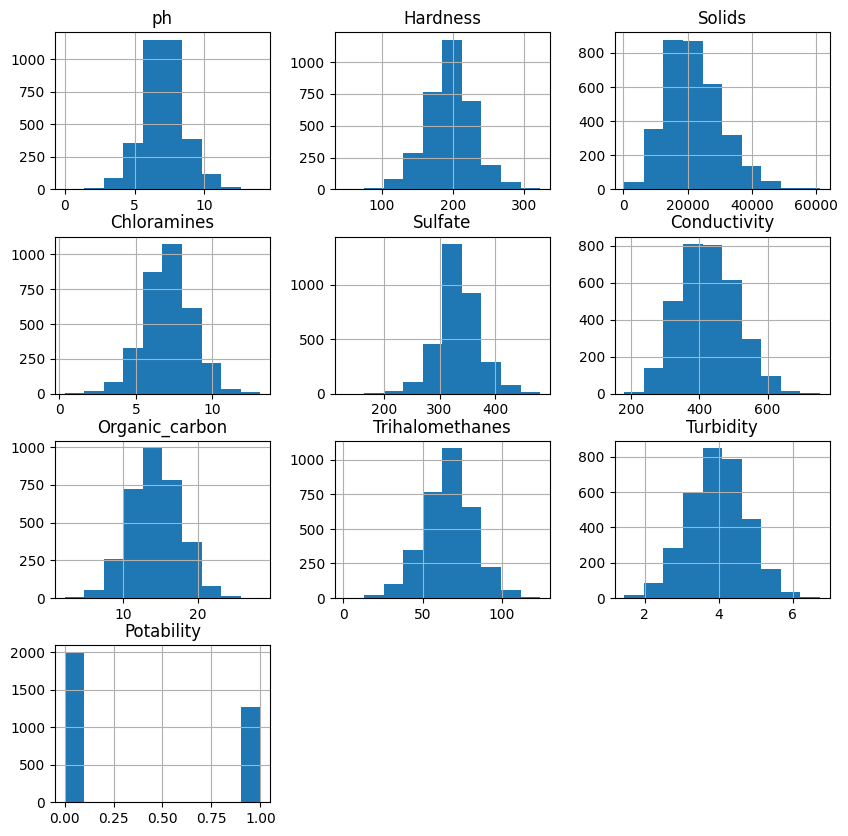

In [17]:
p = data_filled.hist(figsize = (10,10))

Nhận xét sau khi điền giá trị thiếu ta thấy phân phối của các thuộc tính không thay đổi nhiều lắm

## Đặc điểm của các mẫu nước an toàn

Các mẫu nước được xem là an toàn liệu có phù hợp với các thông số do WHO đưa ra

In [18]:
dataSafe = data_filled[data_filled['Potability']==1]
dataSafe.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1278.000000  1278.000000   1278.000000  1278.000000  1278.000000   
mean      7.075470   195.800744  22383.991018     7.169338   332.795124   
std       1.358711    35.547041   9101.010208     1.702988    42.499779   
min       0.227499    47.432000    728.750830     0.352000   129.000000   
25%       6.329107   174.330531  15668.985035     6.094134   309.551154   
50%       7.037063   196.632907  21199.386614     7.215163   333.304549   
75%       7.814692   218.003420  27973.236446     8.199261   356.399723   
max      13.175402   323.124000  56488.672413    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1278.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.602019     3.968328         1.0  
std       82.048446        3.263907        16.006720     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.890960     3.430909         1.0  
50%      420.712729       14.162809        66.717760     3.958576         1.0  
75%      484.155911       16.356245        77.157936     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

Sau khi ta có bảng dữ liệu về những mẫu nước được xem là an toàn ta tiến hành xem "Thế nào là nước an toàn"
- Đối với giá trị pH: thì giá trị dao động từ 6.5 đến 8.5
- Đối với giá trị TDS: nước không được vượt quá 500mg/l đối với nước ăn uống và không vượt quá 1000mg/l đối với nước sinh hoạt.
- Chloramines: nồng độ clo lên tới 4 miligam trên lít (mg/L hoặc 4 phần triệu (ppm)) được coi là an toàn trong nước uống
- Conductivity: Giá trị không vượt quá 400 μS/cm
- Organic_carbon: Giá trị này không vượt quá 4mg/L
- Trihalomethanes: Giá trị lớn hơn 80ppm
- Turbidity: nhỏ hơn 5.00 NTU

Dựa trên các tiêu chí sẽ đánh giá mẫu nước an toàn

In [19]:
temp = dataSafe[(dataSafe['ph'] <= 8.5) & (dataSafe['ph'] >= 6.5)]
temp = temp[temp['Solids'] < 1000]

Ta chỉ lọc với 2 thuộc tính lfa ph là giá trị TDS thì nhận thấy bảng ko còn giá trị phù hợp những. 

Qua đây ta cho rằng đối với tập dữ liệu này giá trị chỉ mang tính tuong đối, không hoàn toàn phù hợp với những điều kiện là ta đặt ra

### Khi đọc bản mô tả thuộc tính thấy được độ dẫn điện được quyết định bởi chất lượng hòa tan của chất rắn. Vậy thì tổng số lượng hòa tan chất rắn và độ dẫn điện sẽ có ảnh hưởng nhất định nào không. Chúng có quan hệ nào không, liệu quan hệ đó có giúp chúng ta tính toán thuộc tính này đựa trên thuộc tính kia hay không?

Nhận xét độ dẫn sẽ bị ảnh hưởng trực tiếp đối với chất rắn hòa tan? Liệu có mối quan hệ nào giữa tổng chất rắn hòa tan và độ dẫn điện hay không.
Dự đoán kết quả: Tống chất rắn hòa tan càng cao thì độ dẫn điện càng hơn 
- Trả lời được câu hỏi này ta có thể giảm chiều dữ liệu nếu khi giá trị của EC phụ thuộc hoặc tuyến tính với TDS
- Điều này sẽ giúp dữ liệu bớt phức tạp hơn.

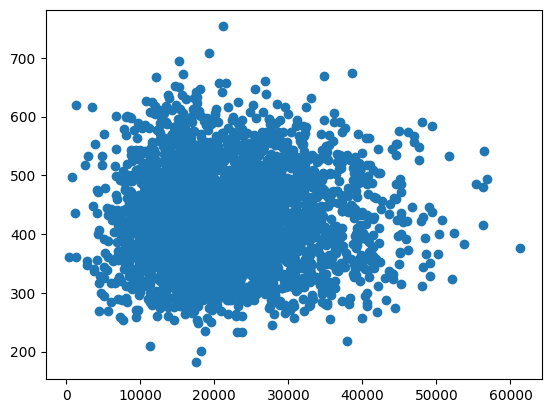

In [20]:
EC_TDS = data_filled[['Solids','Conductivity']].copy()
plt.scatter(data_filled['Solids'], data_filled['Conductivity'], cmap='Spectral')

Nhận xét với việc trực quan hóa 2 thuộc tính Solids và Turbidity ta dễ thấy không có mối quan hệ nào xuất hiện giữu EC và TDS. Điều này cho thấy giá trị EC không phụ thuộc hoàn toàn và TDS. 
- Mặt khác TDS là chỉ số chỉ tổng số chất rắn hòa tan. Chất rắn đây có thể là hữu cơ, hoặc vô cơ. 
- Còn đối với EC là độ dẫn điện, chỉ số này có được nếu chất rắn hòa tan đó phân cực tạo ra các ion dương và ion âm thì quá trình dẫn điện mới được hình thành. Đối với các chất rắn hữu cơ thì khả năng tạo ra các ion thấp. Điêu này dễ thấy đối với một số điểm có chỉ số TDS thấp nhưng giá trị EC lại ở mức 6 7 gần như là cao nhất.

### Độ đục của nước là một trong những chỉ số chúng ta có thế nhìn thấy trực tiếp. Vậy đối với các thuộc tính như: TDS, clo, sulfate, cảbon, tri.... có thể dự đoán được độ đục của nước hay không? Nếu dự đoán được thì mô hình bạn dự đoán sẽ có độ chính xác là bao nhiêu? 


Độ đục được xem là an toàn với giá trị nhỏ hơn 5 NTU. Tiến hành giảm giữa liệucuar độ đụng về giá trị 0 và 1. 
- Với 0 là giá trị lớn hơn hoặc bằng 5 và ngược lại là bằng 1

In [21]:
data_filled['Turbidity_reduce'] = np.array(data_filled['Turbidity'] < 5 , dtype=int)
data_filled

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.417308  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  341.794864   
2     8.099124  224.236259  19909.541732     9.275884  329.237272   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  341.343026   
3273  9.419510  175.762646  33155.578218     7.350233  335.228216   
3274  5.126763  230.603758  11983.869376     6.303357  336.711411   
3275  7.874671  195.102299  17404.177061     7.509306  345.963785   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  \
0       564.308654       10.379783        86.990970   2.963135         0.0   
1       592.885359       15.180013        56.329076   4.500656         0.0   
2       418.606213       16.868637        66.420093   3.055934         0.0   
3       363.266516       18.436524       100.341674   4.628771         0.0   
4       398.410813       11.558279        31.997993   4.075075         0.0   
...            ...             ...              ...        ...         ...   
3271    526.424171       13.894419        66.687695   4.435821         1.0   
3272    392.449580       19.903225        62.554876   2.798243         1.0   
3273    432.044783       11.039070        69.845400   3.298875         1.0   
3274    402.883113       11.168946        77.488213   4.708658         1.0   
3275    327.459760       16.140368        78.698446   2.309149         1.0   

      Turbidity_reduce  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
3271                 1  
3272                 1  
3273                 1  
3274                 1  
3275                 1  

[3276 rows x 11 columns]

Cột Turbidity_reduce chứa giá trị của độ đục sau khi đưa về 0 và 1

Lấy những thuộc tính được xem là ảnh hưởng đến độ đục bao giồm: TDS, col, sulfate, Organic_carbon và Trihalomethanes

In [22]:
cols= ['Solids','Chloramines','Sulfate','Organic_carbon','Trihalomethanes','Turbidity_reduce']
data_reduce = data_filled[cols].copy()
data_reduce

Solids  Chloramines     Sulfate  Organic_carbon  Trihalomethanes  \
0     20791.318981     7.300212  368.516441       10.379783        86.990970   
1     18630.057858     6.635246  341.794864       15.180013        56.329076   
2     19909.541732     9.275884  329.237272       16.868637        66.420093   
3     22018.417441     8.059332  356.886136       18.436524       100.341674   
4     17978.986339     6.546600  310.135738       11.558279        31.997993   
...            ...          ...         ...             ...              ...   
3271  47580.991603     7.166639  359.948574       13.894419        66.687695   
3272  17329.802160     8.061362  341.343026       19.903225        62.554876   
3273  33155.578218     7.350233  335.228216       11.039070        69.845400   
3274  11983.869376     6.303357  336.711411       11.168946        77.488213   
3275  17404.177061     7.509306  345.963785       16.140368        78.698446   

      Turbidity_reduce  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
3271                 1  
3272                 1  
3273                 1  
3274                 1  
3275                 1  

[3276 rows x 6 columns]

Ta tiến hành trực quan dữ liệu xem thử có mối quan hệ nào tồn tại

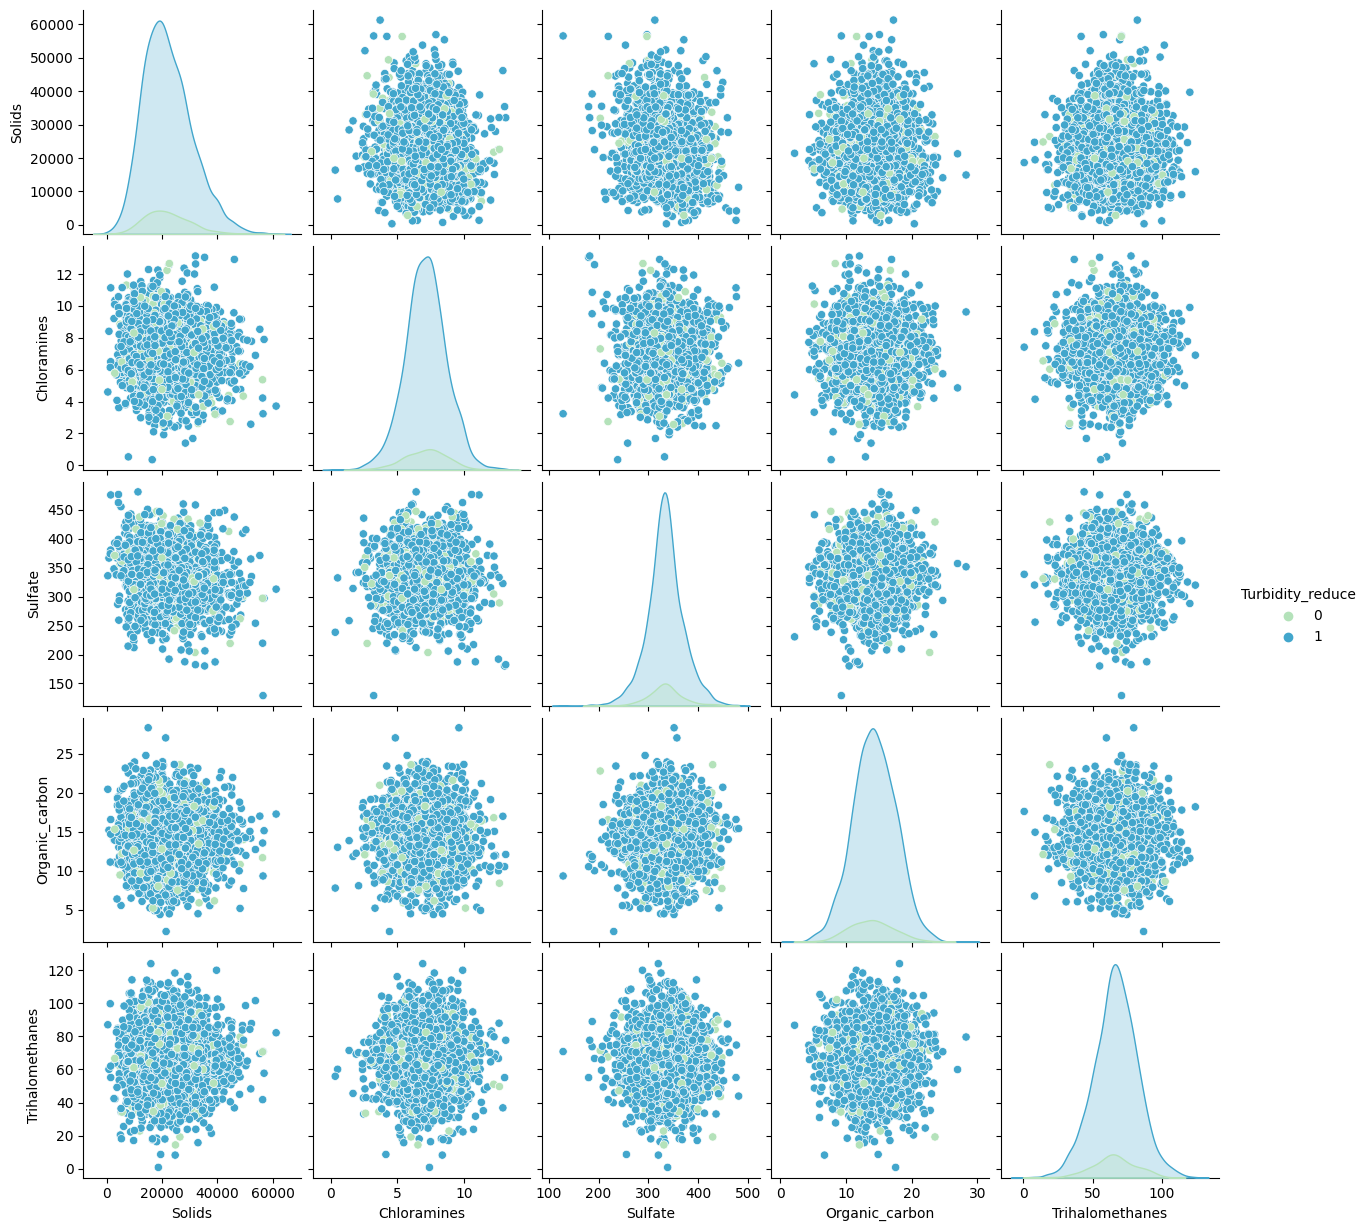

In [23]:
sns.pairplot(data=data_reduce, hue='Turbidity_reduce', palette='GnBu')

Có vẻ như ta có thể mô hình hóa được những thuộc tính trên

Ta tiến hành chia tập dữ liệu thành tập train và valid để mô hình hóa chúng

In [24]:
Y_data = data_reduce['Turbidity_reduce']
X_data = data_reduce.drop('Turbidity_reduce', axis=1)
print(X_data.shape)
print(Y_data.shape)

(3276, 5)
(3276,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=10)

In [26]:
print (x_train.shape,' ',y_train.shape)
print (x_test.shape,' ',y_test.shape)

(2620, 5)   (2620,)
(656, 5)   (656,)


Mo hình bằng LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression()

Dự đoán kết quả và xem độ chính xác như thế nào

In [28]:
y_pred=regressor.predict(x_test)
ac=regressor.score(x_test,y_test)*100
ac

88.10975609756098

Kết quả có vẻ là khả quan đấy

Thử với mô hình MLP xem sao

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
                        ("MLPClassifier", MLPClassifier(hidden_layer_sizes=1000, activation='tanh', solver='sgd',learning_rate='adaptive' , alpha=1, random_state=1 , max_iter=10000))
                        ])

#train_accs = []
#val_accs = []
#alphas = [0, 0.01, 0.1, 0.75, 1, 10, 100]
#best_val_acc = 0
#best_alpha = None
#best_num_top_cp_values = None
##for alpha in alphas:
    # YOUR CODE HERE
    #full_pipeline.set_params(MLPClassifier__alpha=alpha)
train_accs = []
val_accs = []
alphas = [0,0.01,0.1, 1, 10, 100]
best_val_acc = 0
best_alpha = None
best_num_top_cp_values = None
for alpha in alphas:
    # YOUR CODE HERE
    full_pipeline.set_params(MLPClassifier__alpha=alpha)
    full_pipeline.fit(x_train, y_train)
    full_pipeline.predict(x_train)

    train_accs.append(full_pipeline.score(x_train, y_train)*100)
    
    val_accs.append(full_pipeline.score(x_test, y_test)*100)

    best_val_acc, best_alpha = [best_val_acc,  best_alpha, best_num_top_cp_values] if best_val_acc > val_accs[-1] else [val_accs[-1], alpha]

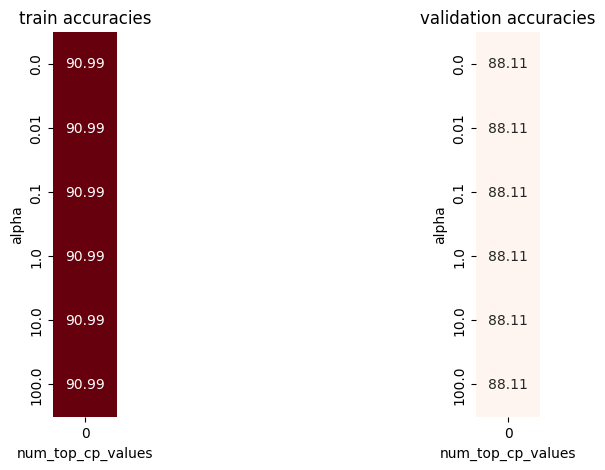

In [36]:
train_accs_df = pd.DataFrame(data=np.array(train_accs).reshape(len(alphas), -1),
                             index=alphas)
val_accs_df = pd.DataFrame(
    data=np.array(val_accs).reshape(len(alphas), -1), 
    index=alphas)
min_err = min(min(train_accs), min(val_accs))
max_err = max(max(train_accs), max(val_accs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('train accuracies'); plt.xlabel('num_top_cp_values'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_accs_df, vmin=min_err, vmax=max_err, square=True, 
            annot=True, cbar=False, fmt='.2f', cmap='Reds')
plt.title('validation accuracies'); plt.xlabel('num_top_cp_values'); plt.ylabel('alpha')

Có lẽ không có nhiều thay đổi lắm. 

Với độ xác thực như thế này có có thể thấy các thông số như: gần nhà là ảnh hưởng đến độ đục của nước.

Vì vậy đối với những nguồn nước có độ đục càng cao lại càng ảnh hưởng đến sức khỏe khá nhiều.


### Ngày nay vấn đề trồng thủy canh được xem là một phương pháp nông nghiệp phổ biến. Trong việc trồng thủy canh thì nguồn nước chiếm vai trò quan trọng trong việc quyết định sản phẩm. Vậy đối với bộ dữ liệu này thì những màu phù hợp để thực hiện làm môi trường để trồng thủy canh. Liệu có phải những mẫu được xem là an toàn sẽ phù hợp với việc trồng thủy canh. 

Để trả lời được câu hỏi này ta xác định nguồn nước trong việc trong thủy canh

Những đặc điểm được lấy từ tại [link](https://funo.vn/kien-thuc-nong-nghiep/dat-va-nuoc/chat-luong-nuoc-tuoi-dung-trong-nong-nghiep)

Trong đó có 3 giá trị cần quan tâm và ta có thể khai thác trên bộ dữ liệu này là: độ pH, độ dẫn điện và độ cứng. Cùng xem xét giá trị này như thế nào nhé!
- Đối với độ pH: Nước tưới phải có độ pH từ 5.0 -7.0.
- Đối với độ dẫn điện: Nước tưới được thêm phân bón hòa tan có EC chủ yếu khoảng 1.5 - 2.5 mS/cm, do đó, để tránh cây bị tổn thương, nước đầu vào phải có EC không cao hơn phạm vi chấp nhận được là 0 - 1.5 mS/cm, các giá trị nhỏ hơn 1 được khuyến nghị cho cây con.
- Đối với độ cứng: Độ cứng là biểu hiện của lượng canxi và magiê trong nước. Canxi và magie là những nguyên tố cần thiết cho sự phát triển của thực vật. Canxi trong khoảng 40 - 100 ppm và magie trong khoảng 30 - 50 ppm được coi là mong muốn cho nước tưới.

Với các thông số nhưng vậy ta xét các điều kiện như sau:
- 5.0 <= pH <= 70
- Conductivity < 1.5 mS/cm tức là 1500 μS/cm
- 35 < giá trị độ cứng < 75

In [60]:
ph_data = data_filled[(data_filled['ph'] > 5) & (data_filled['ph'] < 7)]
ec_data = data_filled[(data_filled['Conductivity'] < 1500)]
hd_data = data_filled[data_filled['Hardness'] < 150]

In [61]:
temp = pd.merge(ph_data,hd_data, how='inner') 
final = pd.merge(temp,ec_data, how='inner') 

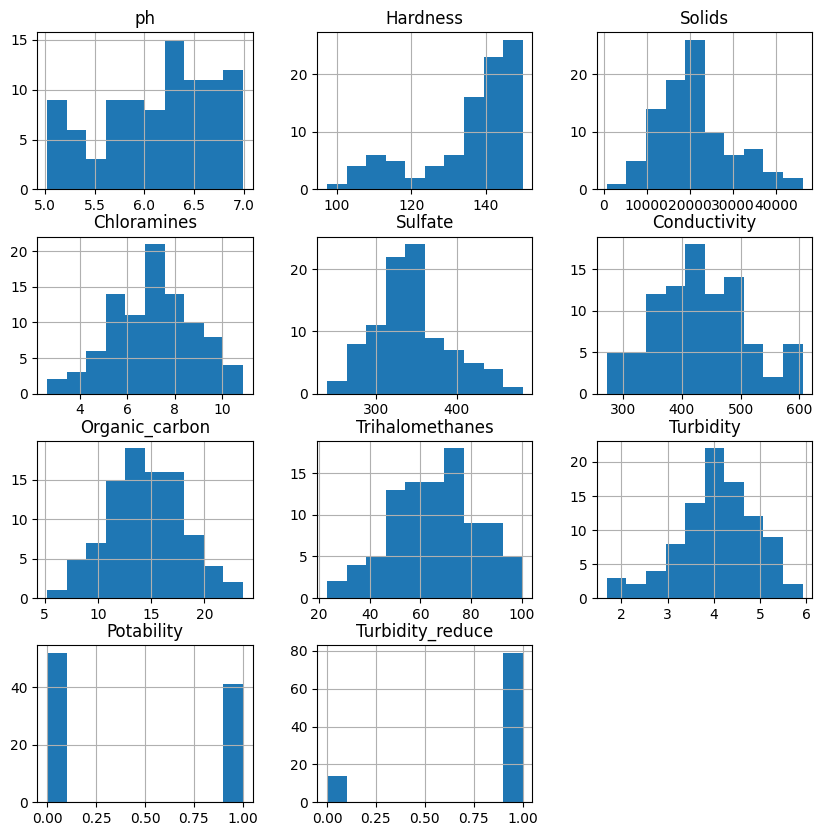

In [62]:
p = final.hist(figsize = (10,10))

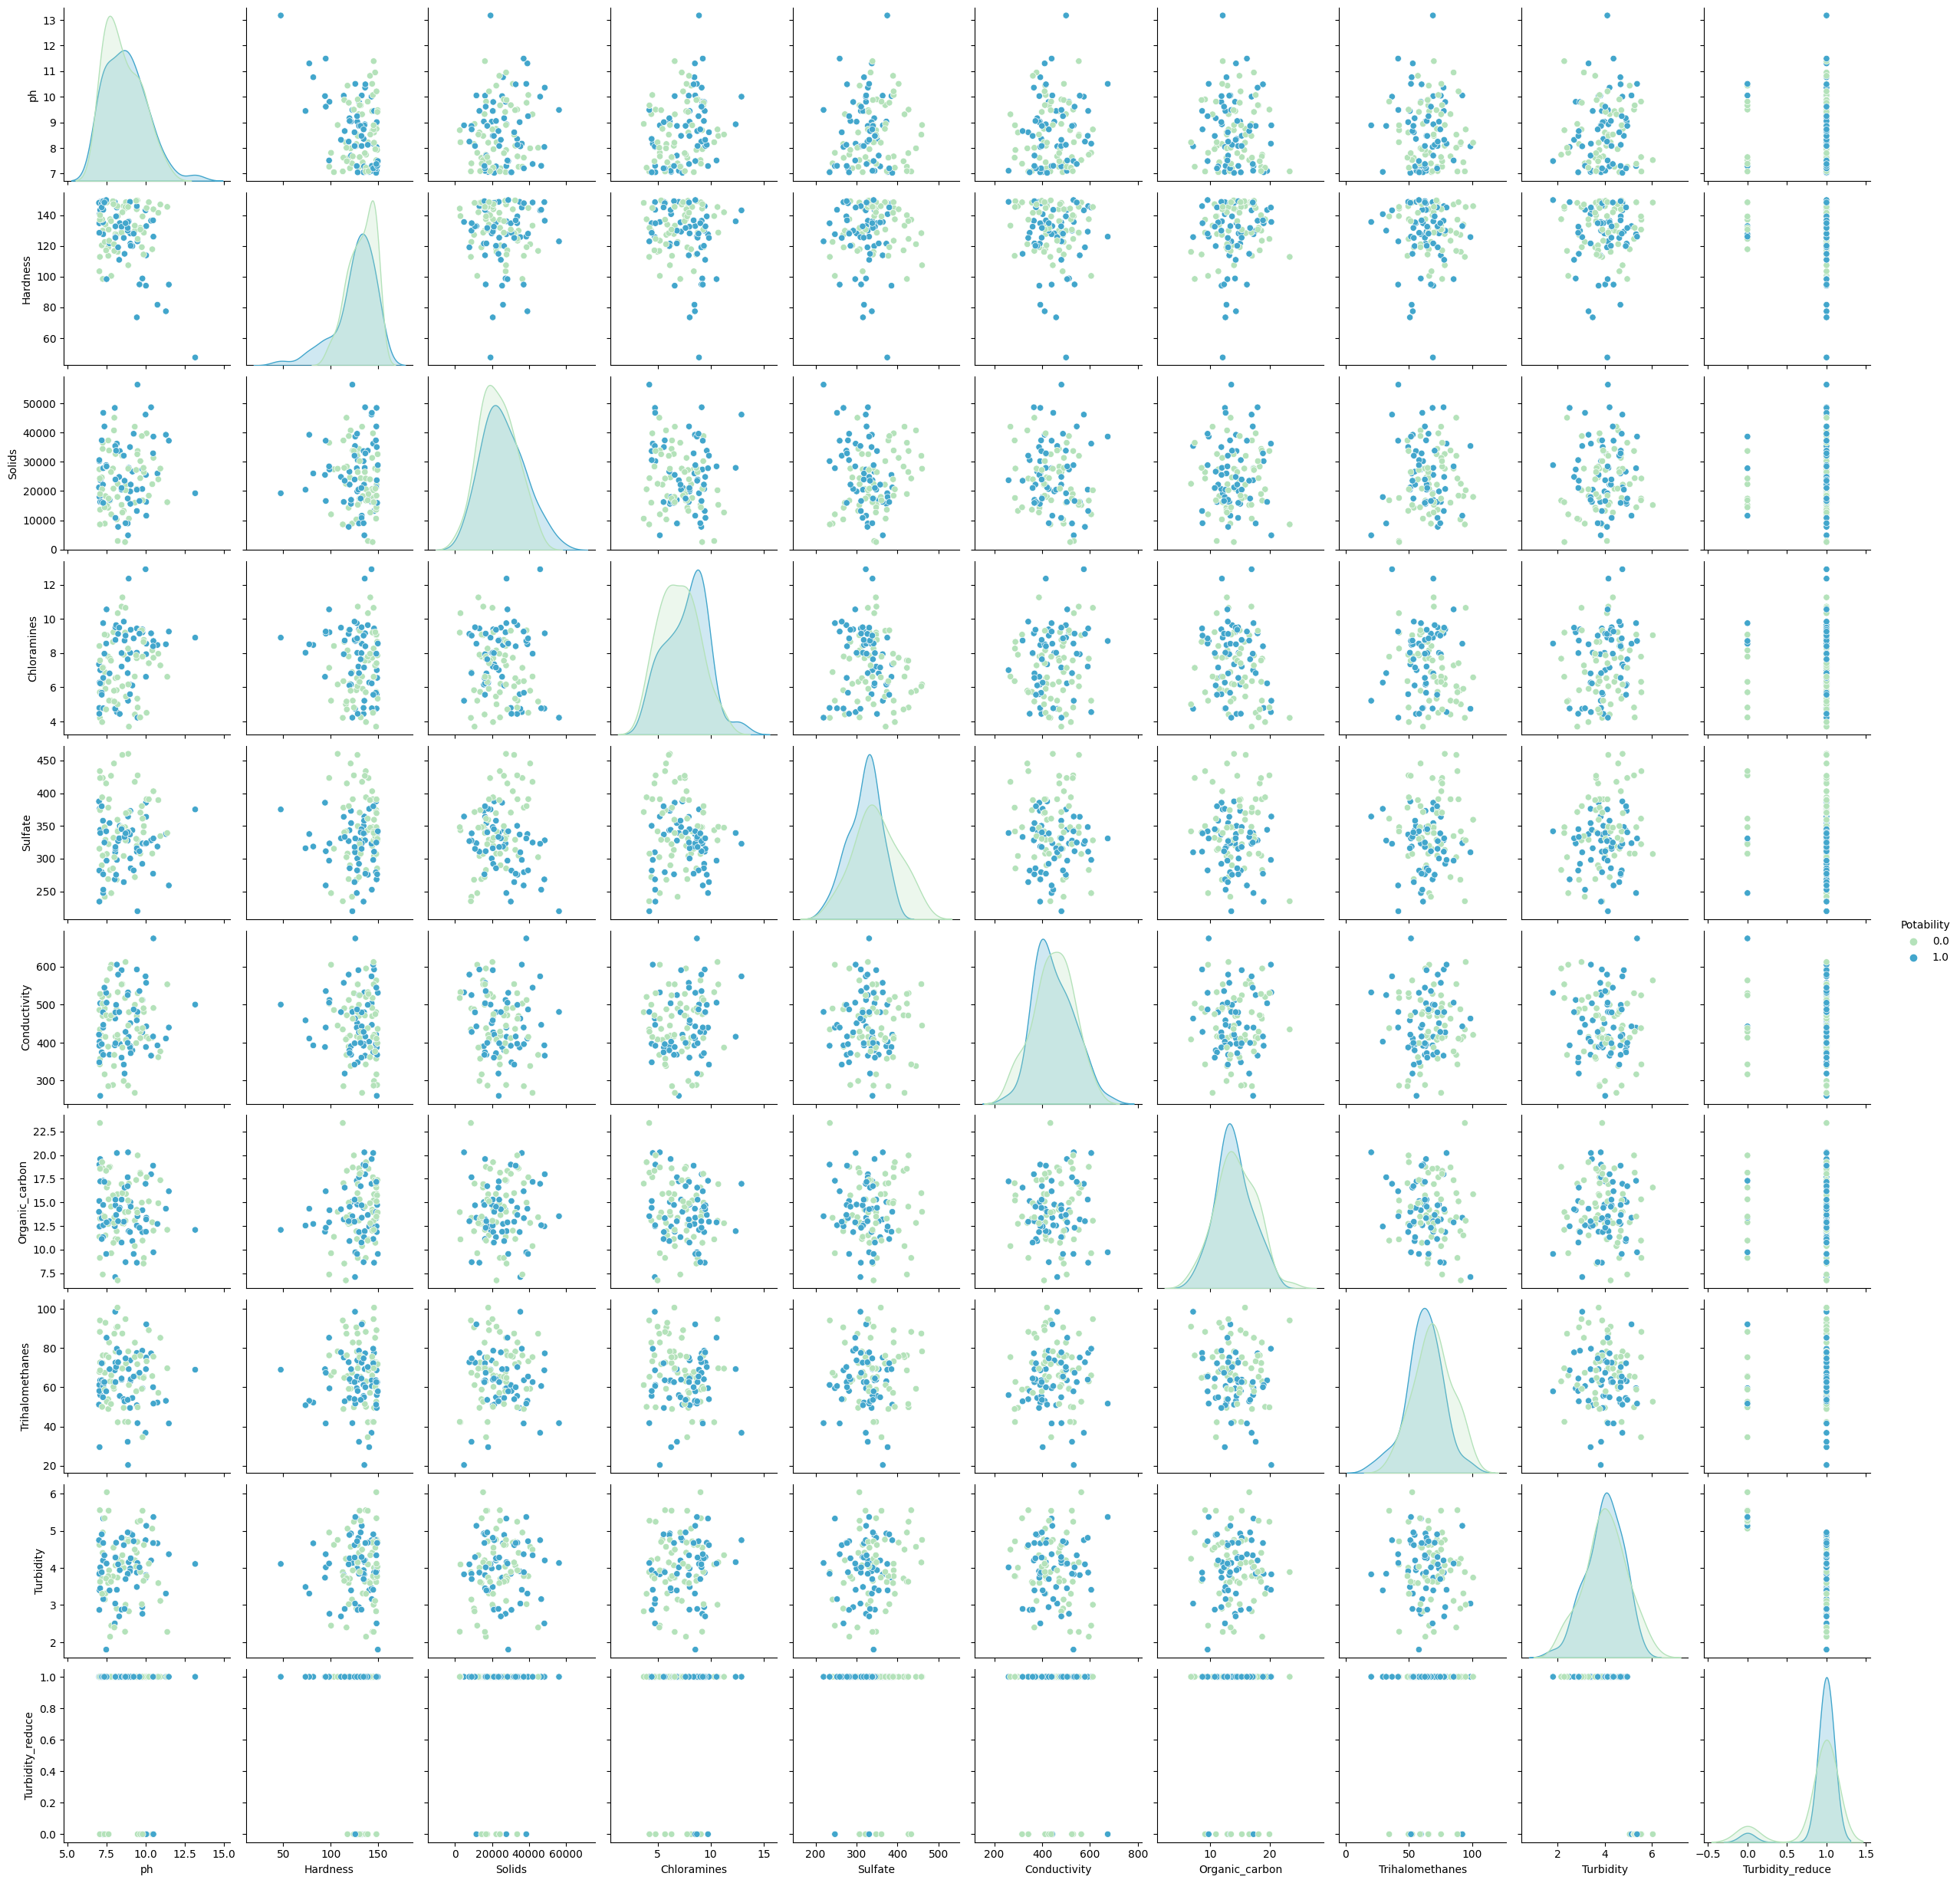

In [59]:
sns.pairplot(data=final, hue='Potability', palette='GnBu')